In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from os import chdir
from glob import glob
import pandas as pd
import glob
import os

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


In [78]:
df = pd.read_csv("1.csv")
df.columns=['Sequence','x','y','z','label']
df=df.drop(columns=['Sequence'])

df=df[df["label"] != 0] #data cleaning: Leaving out unlabeled data || (3719, 4)
print(df.shape)

df.head


(162499, 4)


<bound method NDFrame.head of            x     y     z  label
0       1667  2072  2047      1
1       1611  1957  1906      1
2       1601  1939  1831      1
3       1643  1965  1879      1
4       1604  1959  1921      1
...      ...   ...   ...    ...
162494  1926  2382  2072      7
162495  1927  2388  2074      7
162496  1930  2383  2074      7
162497  1929  2385  2076      7
162498  1926  2385  2078      7

[162499 rows x 4 columns]>

## Data are separated by participant
Each file contains the following information
sequential number, x acceleration, y acceleration, z acceleration, label
Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing


#### Class Distribution 

<AxesSubplot:xlabel='label', ylabel='count'>

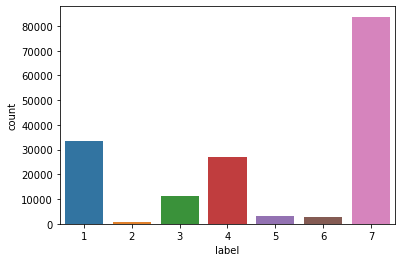

In [79]:
sns.countplot(x = 'label', data=df)

In [80]:
df.head(-5)

x     y     z  label
0       1667  2072  2047      1
1       1611  1957  1906      1
2       1601  1939  1831      1
3       1643  1965  1879      1
4       1604  1959  1921      1
...      ...   ...   ...    ...
162489  1931  2383  2076      7
162490  1927  2383  2079      7
162491  1931  2388  2076      7
162492  1932  2383  2072      7
162493  1931  2386  2073      7

[162494 rows x 4 columns]

In [81]:
#Create input output data
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [82]:
#Over Sample
ros= RandomOverSampler(random_state=0)
ros.fit(X,y)
X_resampled, y_resampled = ros.fit_sample(X,y)
df_resample = pd.concat([X_resampled,y_resampled], axis = 1)
print(df_resample.head)
sns.countplot(x = 'label', data=df_resample)

NameError: name 'RandomOverSampler' is not defined

In [ ]:
# Split into train+val (80%) and test(20%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69) 

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=66)

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=7)

In [ ]:
print("=== Confusion Matrix ===")
cm=confusion_matrix(y_test, rfc_predict)
print(cm)
print('\n')
cm=(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])
print(cm)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

In [ ]:
print("=== Confusion Matrix ===")
confusion_matrix=confusion_matrix(y_test, rfc_predict)
confusion_matrix=(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis])
print(confusion_matrix)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Data are separated by participant
Each file contains the following information sequential number, x acceleration, y acceleration, z acceleration, label Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing

In [ ]:
confusion_matrix

In [ ]:
np.round(confusion_matrix,2)